In [4]:
import pandas as pd

In [9]:
df_full = pd.read_excel('data/property_sales_2014_2024.xlsx')

In [10]:
pd.set_option('display.max_columns', None)

In [12]:
df_full.columns

Index(['ValuationRollNumber', 'ValuationAssessmentNumber',
       'ValuationSuffixNumber', 'StreetNumber', 'FullStreetNumber', 'RoadName',
       'LegalDescription', 'LandArea', 'CapitalValue', 'ImprovementsValue',
       'LandValue', 'DatePriceAgreed', 'DateAdvised', 'DateRequested',
       'PriceValueRelationship', 'GrossSalePrice', 'NetSalePrice', 'Chattels',
       'GSTIncluded', 'Units', 'TotalFloorArea', 'YearsBuiltDescription'],
      dtype='object')

In [11]:
df.shape

(125707, 22)

In [15]:
df.head(5)

,ValuationRollNumber,ValuationAssessmentNumber,ValuationSuffixNumber,StreetNumber,FullStreetNumber,RoadName,LegalDescription,LandArea,CapitalValue,ImprovementsValue,LandValue,DatePriceAgreed,DateAdvised,DateRequested,PriceValueRelationship,GrossSalePrice,NetSalePrice,Chattels,GSTIncluded,Units,TotalFloorArea,YearsBuiltDescription
0,23435,8902,NaN,4,4,Romanee Lane,Lot 2 DP 516990,0.0503,610000,380000,230000,2024-05-27 12:00:00,2024-08-07,2024-08-07,Market - Index,920000,905000,15000.0,0.0,1.0,180.0,2010-2019
1,23562,9616,NaN,26,26,Pitcaithly Street,Lot 16 DP 584756,0.0403,840000,440000,400000,2024-02-04 13:00:00,2024-08-06,2024-08-06,Market - Index,862500,847500,15000.0,0.0,1.0,160.0,2020-2029
2,23447,30300,NaN,3,3,Cable Lane,Lot 381 DP 480473,0.0319,730000,360000,370000,2024-05-18 12:00:00,2024-08-06,2024-08-06,Market - Index,745000,732000,13000.0,0.0,1.0,128.0,2010-2019
3,22670,43600,Q,66,402/66,OXFORD TERRACE,Unit 4B DP 585033 on Lot 2 DP 327023 having sh...,0.0000,650000,390000,260000,2021-06-21 12:00:00,2024-08-02,2024-08-02,Market - Index,720000,707000,13000.0,0.0,1.0,43.0,2000-2009
4,22700,38800,BF,50,50,Huanui Lane,Unit 49 DP 561302 on Lot 502 DP 510090 having ...,0.0000,810000,480000,330000,2024-04-22 12:00:00,2024-08-02,2024-08-02,Market - Index,859000,844000,15000.0,0.0,1.0,134.0,2020-2029


In [21]:
counts = (
  df_full
  .groupby(["ValuationRollNumber", "ValuationSuffixNumber"])
  .size()
  .reset_index(name='n_sales')
)

counts.sort_values('n_sales', ascending=False)

,ValuationRollNumber,ValuationSuffixNumber,n_sales
86,21851,A,159
767,22312,A,140
312,21921,A,139
548,22170,A,134
607,22220,A,132
...,...,...,...
1443,22670,AF,1
1429,22650,H,1
1428,22650,G,1
1412,22632,Q,1


In [22]:
df_full.dtypes

ValuationRollNumber                   int64
ValuationAssessmentNumber             int64
ValuationSuffixNumber                object
StreetNumber                          int64
FullStreetNumber                     object
RoadName                             object
LegalDescription                     object
LandArea                            float64
CapitalValue                          int64
ImprovementsValue                     int64
LandValue                             int64
DatePriceAgreed              datetime64[ns]
DateAdvised                  datetime64[ns]
DateRequested                datetime64[ns]
PriceValueRelationship               object
GrossSalePrice                        int64
NetSalePrice                          int64
Chattels                            float64
GSTIncluded                         float64
Units                               float64
TotalFloorArea                      float64
YearsBuiltDescription                object
dtype: object

In [23]:
df_full['DatePriceAgreed'] = pd.to_datetime(df_full['DatePriceAgreed'])

In [25]:
df_1719 = df_full[df_full['DatePriceAgreed'].dt.year.isin([2017, 2018, 2019])].copy()

In [26]:
df_1719.head()

,ValuationRollNumber,ValuationAssessmentNumber,ValuationSuffixNumber,StreetNumber,FullStreetNumber,RoadName,LegalDescription,LandArea,CapitalValue,ImprovementsValue,LandValue,DatePriceAgreed,DateAdvised,DateRequested,PriceValueRelationship,GrossSalePrice,NetSalePrice,Chattels,GSTIncluded,Units,TotalFloorArea,YearsBuiltDescription
3907,22330,3200,NaN,17,17,AKAROA STREET,Lot 481 DP 16155,0.0647,560000,295000,265000,2019-01-30 13:00:00,2024-02-15,2024-02-15,Market - Non Index,385000,374000,11000.0,0.0,1.0,129.0,1950-1959
5466,21822,69300,NaN,138,138,Te Korari Street,Lot 1640 DP 494538,0.0464,920000,460000,460000,2017-02-28 13:00:00,2023-12-12,2023-12-13,Non Market,50000,50000,0.0,0.0,1.0,172.0,2010-2019
9063,22700,68104,AM,2,301/2,Sugarloaf Lane,"Unit 301 DP 578431 on Lots 2, 3 DP 508853 havi...",0.0000,680000,400000,280000,2019-10-07 00:00:00,2023-08-14,2023-08-14,Market - Index,610000,595000,15000.0,0.0,1.0,76.0,2020-2029
9207,22212,35400,NaN,9,9,ALPHA AVENUE,Lot 2 DP 11304,0.0685,920000,260000,660000,2019-01-21 00:00:00,2023-08-08,2023-08-09,Non Market,695000,695000,0.0,0.0,1.0,132.0,1930-1939
9301,22700,68104,AU,2,401/2,Sugarloaf Lane,"Unit 401 DP 578431 on Lots 2, 3 DP 508853 havi...",0.0000,690000,405000,285000,2019-10-07 00:00:00,2023-08-08,2023-08-08,Market - Index,619000,604000,15000.0,0.0,1.0,75.0,2020-2029


In [27]:
df_1719.shape

(36640, 22)

In [37]:
df_grouped = (
  df_1719.groupby(['ValuationRollNumber', 'ValuationSuffixNumber'])
  .size()
  .reset_index(name='n_sale')
)

df_grouped.shape

(1606, 3)

In [38]:
df_grouped.sort_values('n_sale', ascending=False)

,ValuationRollNumber,ValuationSuffixNumber,n_sale
35,21851,A,53
722,22530,A,49
466,22312,B,46
381,22251,B,44
468,22312,C,43
...,...,...,...
524,22373,B,1
1104,22700,CA,1
1105,22700,CE,1
1106,22700,CF,1


In [32]:
df_repeat = (
  df_1719.groupby(['FullStreetNumber', 'RoadName'])
  .size()
  .reset_index(name='n_sale')
)

df_repeat.shape

(33046, 3)

In [33]:
df_repeat.sort_values('n_sale', ascending=False)

,FullStreetNumber,RoadName,n_sale
24050,481,WAIRAKEI ROAD,4
28697,694,MAIN SOUTH ROAD,4
29119,7,Perendale Street,4
30685,8,PARKWOOD PLACE,4
18586,31,BELLBIRD LANE,4
...,...,...,...
11563,2/28,INWOODS ROAD,1
11562,2/28,INGRID STREET,1
11561,2/28,HORNBROOK STREET,1
11560,2/28,HAMPTON PLACE,1


<Axes: >

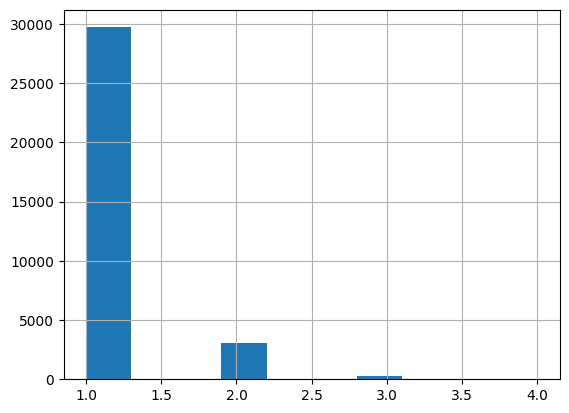

In [34]:
df_repeat['n_sale'].hist()